In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import warnings

# Exploratory Data Analysis

In [45]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('car_resale_prices.csv')

In [46]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [4]:
# there are a mix of categorical and numeric columns
# label column is resale_price
# columns Unnamed,full_name could be dropped



In [47]:
df.shape

(17446, 15)

In [6]:
# there are 17446 observations and 15 features

In [48]:
df.dtypes

Unnamed: 0             int64
full_name             object
resale_price          object
registered_year       object
engine_capacity       object
insurance             object
transmission_type     object
kms_driven            object
owner_type            object
fuel_type             object
max_power             object
seats                float64
mileage               object
body_type             object
city                  object
dtype: object

In [8]:
# columns resale_price,engine_capacity,kms_driven,max_power,mileage is shown as objects. They have to be converted to numerical columns
# some columns require encoding as they are categorical

In [49]:
print(df.columns)

Index(['Unnamed: 0', 'full_name', 'resale_price', 'registered_year',
       'engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city'],
      dtype='object')


In [50]:
df['mileage'] = pd.to_numeric(df['mileage'].astype(str).str.replace('kmpl', ''), errors='coerce')

In [51]:
df['max_power'] = pd.to_numeric(df['max_power'].astype(str).str.replace('bhp', ''), errors='coerce')

In [52]:
df['resale_price'] = pd.to_numeric(df['resale_price'].astype(str).str.replace('₹', '').str.replace('Lakh', ''), errors='coerce')

In [53]:
df['kms_driven'] = pd.to_numeric(df['kms_driven'].astype(str).str.replace('Kms', '').str.replace(',', ''), errors='coerce')

In [54]:
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'].astype(str).str.replace('cc', ''), errors='coerce')

In [55]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197.0,Third Party insurance,Manual,40000.0,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra
1,1,2018 Tata Hexa XTA,10.00,2018,2179.0,Third Party insurance,Automatic,70000.0,First Owner,Diesel,153.86,7.0,17.60,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,4.50,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,4.50,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086.0,Third Party insurance,Manual,80000.0,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra


In [10]:
# Step 2: Summary statistics of numeric columns

In [56]:
df.describe()

,Unnamed: 0,resale_price,engine_capacity,kms_driven,max_power,seats,mileage
count,17446.000000,17212.000000,17432.000000,1.744300e+04,16924.000000,17436.000000,16787.000000
mean,8722.500000,8.713414,1423.135383,5.862822e+04,103.902932,5.205494,19.317058
std,5036.370734,9.689100,474.683974,6.426464e+04,44.840775,0.669321,4.384732
min,0.000000,1.000000,0.000000,2.860000e+02,25.400000,2.000000,6.700000
25%,4361.250000,3.850000,1197.000000,3.192200e+04,78.900000,5.000000,17.000000
50%,8722.500000,5.900000,1248.000000,5.481700e+04,88.500000,5.000000,18.900000
75%,13083.750000,9.200000,1498.000000,7.991300e+04,118.350000,5.000000,21.490000
max,17445.000000,97.000000,5998.000000,6.275000e+06,558.000000,14.000000,140.000000


In [12]:
# There are some missing values in resale_price,engine_capacity,max_power,mileage
# some columns may have outliers

In [57]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0           0.000000
full_name            0.000000
resale_price         1.341282
registered_year      0.395506
engine_capacity      0.080248
insurance            0.040124
transmission_type    0.000000
kms_driven           0.017196
owner_type           0.257939
fuel_type            0.000000
max_power            2.992090
seats                0.057320
mileage              3.777370
body_type            0.000000
city                 0.000000
dtype: float64

In [14]:
# -missing rows to be removed

In [15]:
# Step 3: Value counts of category columns

In [58]:
df.select_dtypes(include='object').columns

Index(['full_name', 'registered_year', 'insurance', 'transmission_type',
       'owner_type', 'fuel_type', 'body_type', 'city'],
      dtype='object')

In [60]:
df.select_dtypes(include='object').describe()

,full_name,registered_year,insurance,transmission_type,owner_type,fuel_type,body_type,city
count,17446,17377,17439,17446,17401,17446,17446,17446
unique,6923,243,7,2,5,5,26,13
top,2016 Hyundai Grand i10 Sportz,2022,Third Party insurance,Manual,First Owner,Petrol,Hatchback,Delhi
freq,51,399,7559,12541,12293,11336,7343,3036


In [ ]:
# column registered_year may be dropped

In [61]:

df.insurance.value_counts()

Third Party insurance    7559
Comprehensive            6414
Third Party              1973
Zero Dep                  834
Not Available             651
1                           5
2                           3
Name: insurance, dtype: int64

In [62]:
df.transmission_type.value_counts()

Manual       12541
Automatic     4905
Name: transmission_type, dtype: int64

In [63]:
df.owner_type.value_counts()

First Owner     12293
Second Owner     4150
Third Owner       780
Fourth Owner      127
Fifth Owner        51
Name: owner_type, dtype: int64

In [64]:
df.fuel_type.value_counts()

Petrol      11336
Diesel       5516
CNG           504
Electric       61
LPG            29
Name: fuel_type, dtype: int64

In [65]:
df.body_type.value_counts()

Hatchback        7343
Sedan            4781
SUV              4406
MUV               759
Minivans           65
Maruti             19
Pickup             13
Coupe              10
Cars                8
Tata                7
Mercedes-Benz       6
Mahindra            4
Chevrolet           3
Jaguar              3
Wagon               3
BMW                 2
Toyota              2
Datsun              2
Honda               2
Convertibles        2
Audi                1
Porsche             1
Volvo               1
Hyundai             1
Skoda               1
Isuzu               1
Name: body_type, dtype: int64

In [ ]:
# for body type, less frequent types (below 500) may be dropped

In [71]:
df.city.value_counts()

Delhi         3036
Bangalore     2334
Mumbai        2109
Hyderabad     1584
Pune          1394
Chennai       1344
Ahmedabad     1330
Kolkata       1181
Gurgaon       1043
Jaipur         897
Lucknow        551
Chandigarh     437
Agra           206
Name: city, dtype: int64

In [66]:
df.columns

Index(['Unnamed: 0', 'full_name', 'resale_price', 'registered_year',
       'engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city'],
      dtype='object')

In [67]:
df['resale_price'].groupby([df['owner_type']]).mean()

owner_type
Fifth Owner     2.803659
First Owner     9.372853
Fourth Owner    3.919829
Second Owner    7.466447
Third Owner     5.364791
Name: resale_price, dtype: float64

In [70]:
df['resale_price'].groupby([df['fuel_type']]).mean()

fuel_type
CNG          4.901116
Diesel      12.626338
Electric    17.468571
LPG          2.196957
Petrol       6.925937
Name: resale_price, dtype: float64

In [73]:
pd.crosstab(df.city,df.owner_type,values=df.resale_price,aggfunc='mean')

owner_type,Fifth Owner,First Owner,Fourth Owner,Second Owner,Third Owner
city,,,,,
Agra,2.000000,5.543565,2.880000,4.483226,3.118000
Ahmedabad,1.942857,8.091448,2.340909,5.915294,3.551724
Bangalore,3.710909,10.099717,4.962500,8.307718,5.969298
Chandigarh,2.425000,6.867204,3.650000,6.156018,3.720000
Chennai,1.450000,10.770328,2.841667,6.993134,4.668654
Delhi,6.000000,10.318510,2.435000,9.613717,5.266337
Gurgaon,1.250000,9.098930,2.932500,5.572308,6.590000
Hyderabad,3.000000,9.053507,2.500000,5.810824,5.895682
Jaipur,2.168571,7.972422,2.552857,5.963301,4.039365


In [27]:
# Step 4: Data Visualization

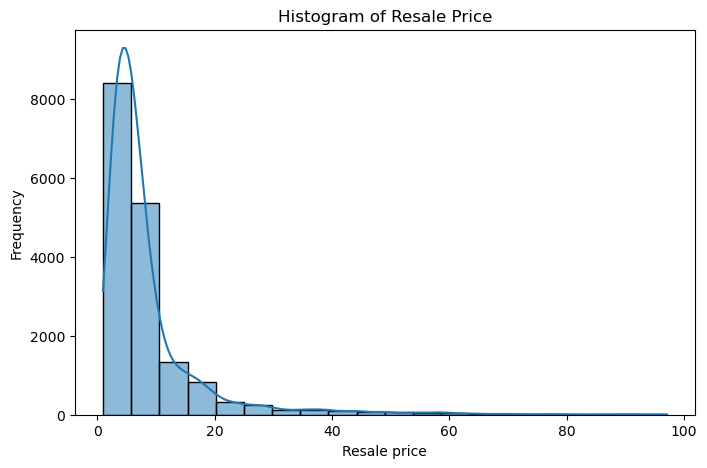

In [74]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['resale_price'], bins=20, kde=True)
plt.title('Histogram of Resale Price')
plt.xlabel('Resale price')
plt.ylabel('Frequency')
plt.show()

In [29]:
# the actual productivity is normally distributed with right skewed

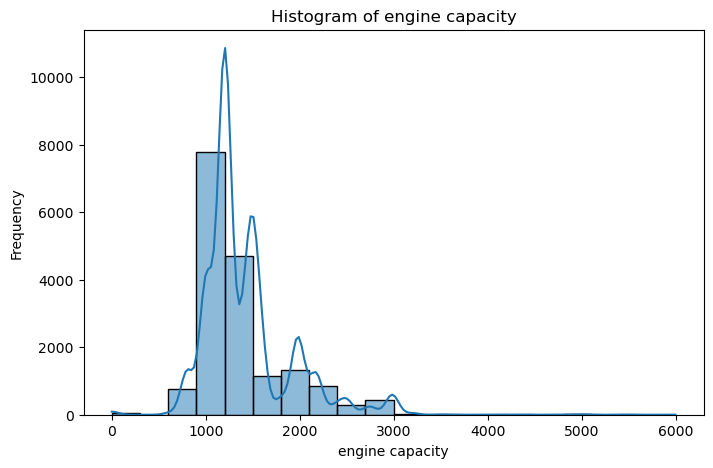

In [75]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['engine_capacity'], bins=20, kde=True)
plt.title('Histogram of engine capacity')
plt.xlabel('engine capacity')
plt.ylabel('Frequency')
plt.show()

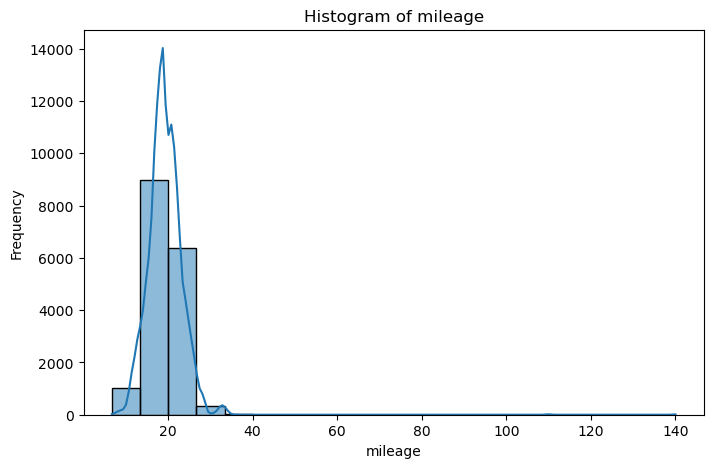

In [76]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['mileage'], bins=20, kde=True)
plt.title('Histogram of mileage')
plt.xlabel('mileage')
plt.ylabel('Frequency')
plt.show()

In [33]:
#there are a lot of outliers in mileage

In [37]:
# there may be outliers

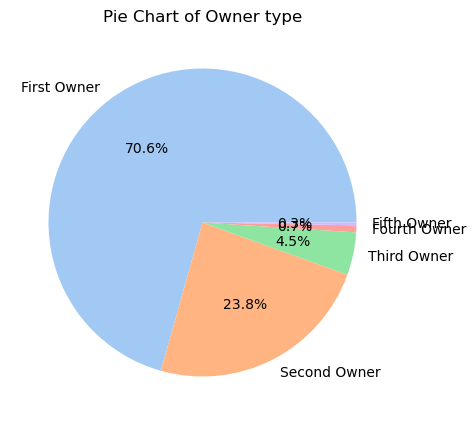

In [77]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['owner_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Owner type')
plt.ylabel('')
plt.show()

In [ ]:
# owner type distribution is not uniform

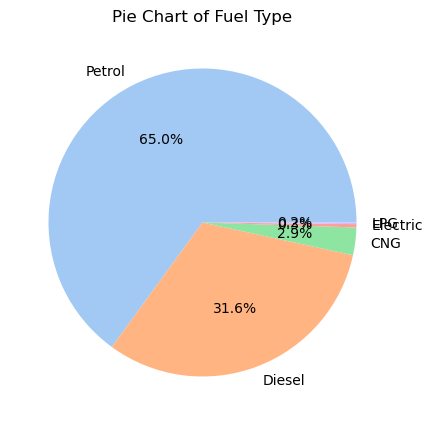

In [78]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Fuel Type')
plt.ylabel('')
plt.show()

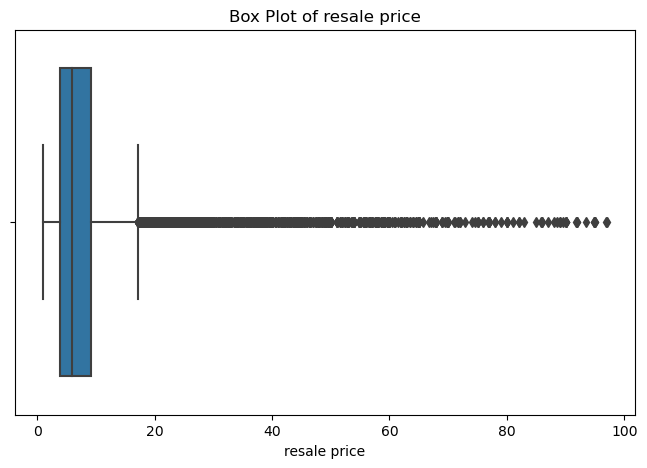

In [79]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['resale_price'])
plt.title('Box Plot of resale price')
plt.xlabel('resale price')
plt.show()

In [41]:
# shows some outliers in resale price column

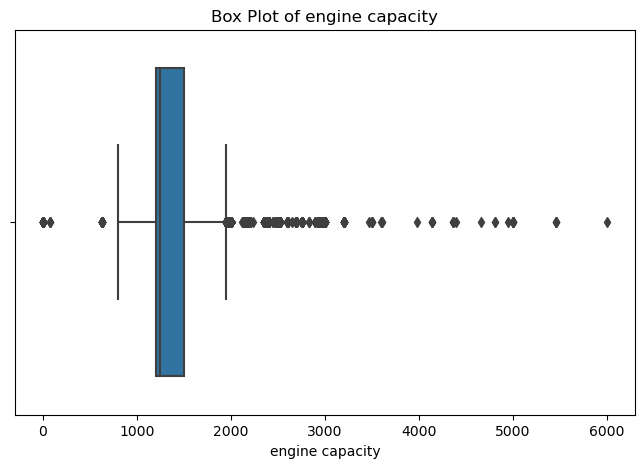

In [81]:

# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['engine_capacity'])
plt.title('Box Plot of engine capacity')
plt.xlabel('engine capacity')
plt.show()

<Axes: xlabel='engine_capacity', ylabel='resale_price'>

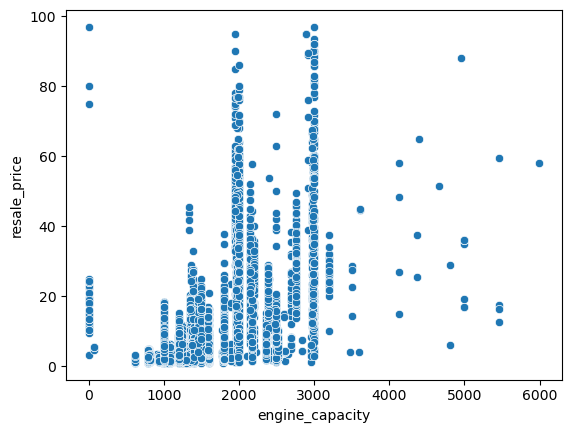

In [82]:
sns.scatterplot(x=df.engine_capacity, y=df.resale_price)

<Axes: xlabel='kms_driven', ylabel='resale_price'>

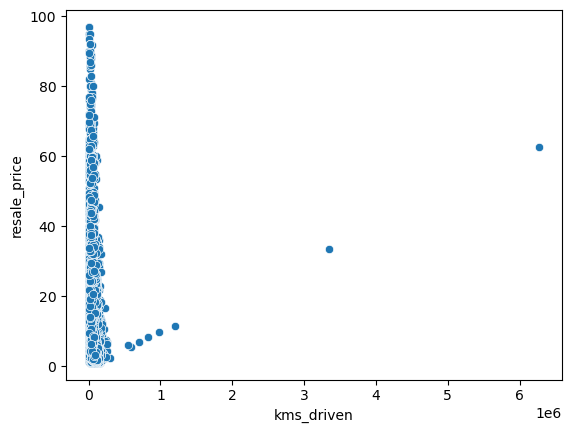

In [83]:
sns.scatterplot(x=df.kms_driven, y=df.resale_price)

In [ ]:
# resale price seems to be higher for less kms driven

<Axes: xlabel='max_power', ylabel='resale_price'>

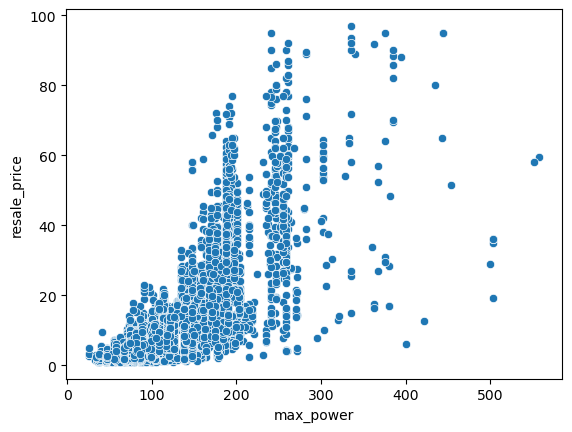

In [84]:
sns.scatterplot(x=df.max_power, y=df.resale_price)

In [46]:
# Step 5: Observations from data visualization
# - columns Unnamed,full_name could be dropped
# - missing rows to be trimmed
# - Outliers require rows to be trimmed
# - for body type, less frequent types (below 500) may be dropped



# Data Preprocessing

In [85]:
# Step 1: Remove Unnamed,full_name columns
df = df.drop(columns=['Unnamed: 0', 'full_name'])

In [86]:
df.shape

(17446, 13)

In [87]:
df.isnull().sum()

resale_price         234
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            522
seats                 10
mileage              659
body_type              0
city                   0
dtype: int64

In [88]:
df = df.dropna()

In [89]:
df.shape

(16078, 13)

In [90]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()


,resale_price,engine_capacity,kms_driven,max_power,seats,mileage
0,5.45,1197.0,40000.0,83.10,5.0,21.40
1,10.00,2179.0,70000.0,153.86,7.0,17.60
2,4.50,1197.0,70000.0,83.14,5.0,20.85
3,4.50,1197.0,70000.0,83.14,5.0,20.85
4,1.60,1086.0,80000.0,68.05,5.0,19.81


In [91]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [92]:
df = outlier_remover(df_num,df)

In [93]:
df.shape

(12305, 13)

<Axes: xlabel='resale_price'>

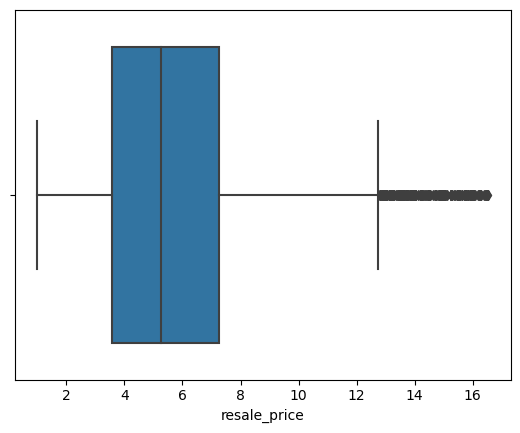

In [94]:
sns.boxplot(x=df['resale_price'])

In [95]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='resale_price'>

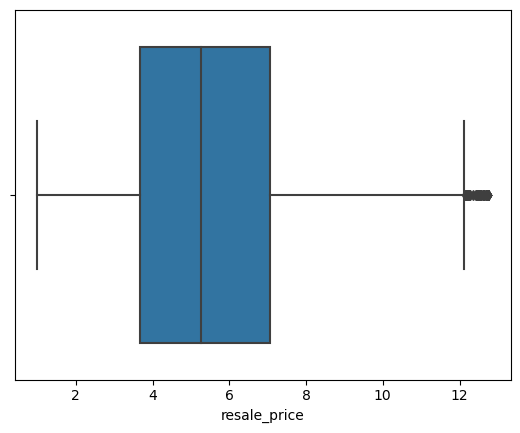

In [97]:
sns.boxplot(x=df['resale_price'])

In [98]:
df.shape

(11237, 13)

In [99]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='resale_price'>

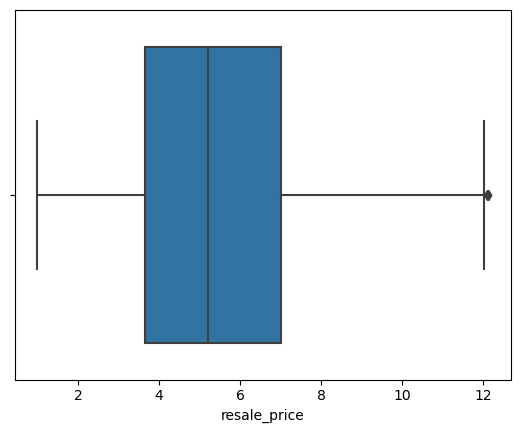

In [100]:
sns.boxplot(x=df['resale_price'])

In [101]:
df.shape

(11068, 13)

In [102]:
X = df.drop('resale_price', axis=1)
y = df.resale_price
X.head()

,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017,1197.0,Third Party insurance,Manual,40000.0,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra
2,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
3,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
4,2009,1086.0,Third Party insurance,Manual,80000.0,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra
5,2015,1197.0,Third Party insurance,Manual,70000.0,First Owner,Petrol,81.86,5.0,17.19,Hatchback,Agra


In [103]:
X_num = X.select_dtypes('number')
X_num.head()

,engine_capacity,kms_driven,max_power,seats,mileage
0,1197.0,40000.0,83.10,5.0,21.40
2,1197.0,70000.0,83.14,5.0,20.85
3,1197.0,70000.0,83.14,5.0,20.85
4,1086.0,80000.0,68.05,5.0,19.81
5,1197.0,70000.0,81.86,5.0,17.19


In [104]:
X_cat = X.select_dtypes('object')
X_cat.head()

,registered_year,insurance,transmission_type,owner_type,fuel_type,body_type,city
0,2017,Third Party insurance,Manual,First Owner,Petrol,Hatchback,Agra
2,2015,Third Party insurance,Manual,Second Owner,Petrol,Sedan,Agra
3,2015,Third Party insurance,Manual,Second Owner,Petrol,Sedan,Agra
4,2009,Third Party insurance,Manual,First Owner,Petrol,Hatchback,Agra
5,2015,Third Party insurance,Manual,First Owner,Petrol,Hatchback,Agra


In [105]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [106]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [107]:
X_num_scaled.describe()

,engine_capacity,kms_driven,max_power,seats,mileage
count,11068.000000,11068.000000,11068.000000,11068.0,11068.000000
mean,0.445490,0.402551,0.500810,0.0,0.511561
std,0.189419,0.208780,0.202728,0.0,0.191270
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.388832,0.240654,0.351700,0.0,0.381081
50%,0.388832,0.389205,0.455217,0.0,0.506757
75%,0.656853,0.544485,0.628370,0.0,0.635135
max,1.000000,1.000000,1.000000,0.0,1.000000


In [110]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [111]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [112]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((11068, 254), (11068, 5), (11068, 249))

In [113]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
engine_capacity    0
kms_driven         0
max_power          0
seats              0
mileage            0
                  ..
city_Jaipur        0
city_Kolkata       0
city_Lucknow       0
city_Mumbai        0
city_Pune          0
Length: 254, dtype: int64
0
(11068, 254)
(11068,)


In [114]:
X.describe()

,engine_capacity,kms_driven,max_power,seats,mileage,registered_year_2004,registered_year_2005,registered_year_2006,registered_year_2007,registered_year_2008,...,city_Chandigarh,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune
count,11068.000000,11068.000000,11068.000000,11068.0,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,...,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,0.445490,0.402551,0.500810,0.0,0.511561,0.000090,0.000361,0.001175,0.001265,0.002891,...,0.026382,0.080954,0.162812,0.060987,0.095229,0.050416,0.065504,0.036140,0.105258,0.082851
std,0.189419,0.208780,0.202728,0.0,0.191270,0.009505,0.019008,0.034253,0.035545,0.053695,...,0.160277,0.272777,0.369210,0.239317,0.293545,0.218811,0.247425,0.186647,0.306900,0.275670
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388832,0.240654,0.351700,0.0,0.381081,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.388832,0.389205,0.455217,0.0,0.506757,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.656853,0.544485,0.628370,0.0,0.635135,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(8854, 254)
(2214, 254)
(8854,)
(2214,)


In [74]:
# Step 9: Observations after preprocessing
# - Removed Unnamed,full_name columns
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# KNN Regression

In [75]:
# Train the model with different K values and calculate MAPE scores using CV

In [117]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [118]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [119]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [120]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = np.mean(np.abs(predictions - y_test_fold))
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [121]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 3 and minimum test score is 0.23418743273222892


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 5 and minimum test score is 0.24564695341898618


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 5 and minimum test score is 1.0603152281970176


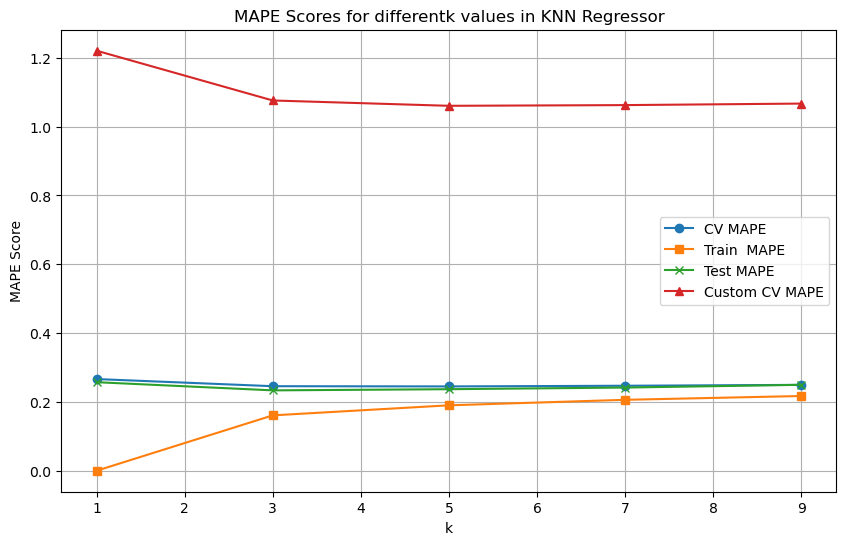

In [122]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [84]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [88]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [89]:
#calling custom functions for KNN
test_mape_scores=[]
train_mape_scores=[]
for k in k_list:
    y_pred_test =knn(X_train,X_test,y_train,k)
    y_pred_train =knn(X_train,X_train,y_train,k)
    test_mape = find_mape(y_test,y_pred_test)
    test_mape_scores.append(test_mape)
    train_mape = find_mape(y_train,y_pred_train)
    train_mape_scores.append(train_mape)


In [96]:
best_k = k_list[np.argmin(test_mape_scores)]
print("best k with Custom KNN implementation is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))

best k with Custom KNN implementation is 9 and minimum test score is 0.1052761620975954


In [ ]:
#plot with custom KNN function
plt.figure(figsize=(10, 6))
#plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_list, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_list, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Inference:
# - best k with holdout test is 3 
# - best k with cross validation is 5 
